# Basit Doğrusal Regresyon

##Modelin Kurulması

Veriyi projemize ekledik.

In [ ]:
import pandas as pd 
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Veri hakkında bilgi edinmek için.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Seçtiğimiz iki değişken arasında bir ilişki varmı diye baktık.

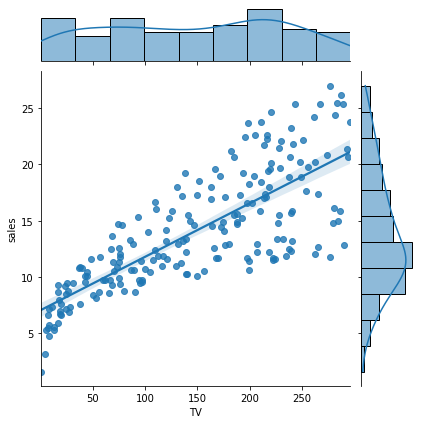

In [ ]:
import seaborn as sns
sns.jointplot(x="TV",y="sales",data=df,kind="reg");

Lineer Regresyonu dahil ettik.

In [ ]:
from sklearn.linear_model import LinearRegression


X bağımsız ve Y bağımlı değişkenlerini seçtik.

In [ ]:
X = df[["TV"]]
Y= df[["sales"]]

In [ ]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
Y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


Regresyon objesi oluşturduk ve bu objeyi X ve Y değişkenleriyle kurduk.

In [ ]:
reg = LinearRegression()

In [ ]:
model = reg.fit(X,Y)

In [ ]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.intercept_ #Sabitimiz ß0

array([7.03259355])

In [ ]:
model.coef_ #Katsayımız ß1

array([[0.04753664]])

R kare ifadesi. Bağımlı değişkendeki değişikliğin bağımsız değişkenlerce açıklanma yüzdesi.

In [ ]:
model.score(X,Y)

0.611875050850071

##Tahmin

Modelden bulduğumuz doğru.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


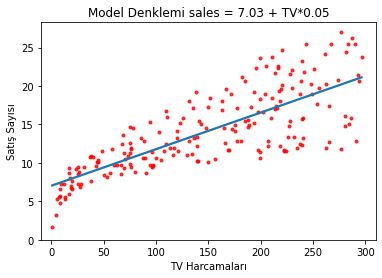

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları") 
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Tahmin ediyoruz.

In [ ]:
model.predict([[165]])

array([[14.87613922]])

In [ ]:
new_data = [[5],[15],[30]]

In [ ]:
model.predict(new_data)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

##Artıklar
MSE => Mean Square Error </br>
RMSE => Root Mean Square Error

In [ ]:
Y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [ ]:
tahmin = pd.DataFrame(model.predict(X)[0:10])

In [ ]:
gerçek = Y[:10]

In [ ]:
hatalar = pd.concat([gerçek,tahmin],axis=1, )
hatalar.columns = ["gerçek","tahmin"]
hatalar

,gerçek,tahmin
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [ ]:
hatalar["hata"] = hatalar.gerçek - hatalar.tahmin
hatalar

,gerçek,tahmin,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [ ]:
hatalar["hata_kareler"] = hatalar.hata**2
hatalar

,gerçek,tahmin,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [ ]:
MSE = hatalar.hata_kareler.mean()

9.290350329638102

#Çoklu Doğrusal Regresyon

##Modelin Kurulması

In [ ]:
import pandas as pd 
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X= df.drop("sales",axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
Y = df[["sales"]]
Y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


###1) Stats Model

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
lm = sm.OLS(Y,X)

In [ ]:
model = lm.fit()

Prob (F-statistic) eğer 0.05 den küçük ise bu model istatistiki olarak anlamlıdır denebilir.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Thu, 24 Jun 2021   Prob (F-statistic):                   2.43e-171
Time:                        13:07:23   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Formül :
sales = TV\*0.0538 + radio\*0.2222 +newspaper\*0.0168

###1) sklearn Model

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

modeli kurduk

In [ ]:
model = lm.fit(X,Y)

sabit sayımızı aldık

In [ ]:
model.intercept_ #sabit

array([2.93888937])

değişkenlerin katsayılarını aldık

In [ ]:
model.coef_ #katsayılar

array([[ 0.04576465,  0.18853002, -0.00103749]])

##Tahmin

Sales = 2.94 + TV\*0.04 + radio\*0.19 - newspaper\*0.001

In [ ]:
new_data = [[300],[120],[400]]
new_data = pd.DataFrame(new_data).T
new_data

,0,1,2
0,300,120,400


In [ ]:
model.predict(new_data)

array([[38.87688782]])

##Hata ölçümü

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE =mean_squared_error(Y,model.predict(X))
MSE

2.784126314510936

In [ ]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

##Model Tuning

Veri setini ayırma.

###Hold-Out

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2 ,random_state= 99)

In [ ]:
x_train.head()

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [ ]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)

Train Error

In [ ]:
RMSETR = np.sqrt(mean_squared_error( y_train,model.predict(x_train)))
RMSETR

1.723682482265075

Test Error

In [ ]:
RMSETE = np.sqrt(mean_squared_error( y_test,model.predict(x_test)))
RMSETE

1.4312783138301646

###K-Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

Train Error

In [ ]:
RMSETR = np.sqrt(np.mean(-cross_val_score(model,x_train,y_train,cv=10,scoring = "neg_mean_squared_error")))
RMSETR

1.8212712522395245

In [ ]:
RMSETR = np.sqrt(np.mean(-cross_val_score(model,X,Y,cv=10,scoring = "neg_mean_squared_error")))
RMSETR

1.749276312684338

#Ridge Regresyon

##Modelin Kurulması

In [ ]:
from sklearn.linear_model import Ridge
from sklearn import model_selection
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import RidgeCV 
import matplotlib.pyplot as plt

Kategorik değişkenleri dummy değişkene çevirdik. one hot encoding yaklaşımını kullandık.Sonrasında veri setimizi 75 e 25 olacak şekilde eğitim ve test olarak ayırdık.

In [ ]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

[[1       475.0
  2       480.0
  3       500.0
  4        91.5
  5       750.0
          ...  
  317     700.0
  318     875.0
  319     385.0
  320     960.0
  321    1000.0
  Name: Salary, Length: 263, dtype: float64]]

In [ ]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [ ]:
df.shape

(263, 20)

In [ ]:
ridge_model = Ridge(alpha=0.5).fit(x_train,y_train)

In [ ]:
ridge_model

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_model.coef_#Katsayılar

array([ -1.77855499,   8.81204755,   7.28303878,  -3.33173668,
        -2.07784375,   5.42337751,   7.55029149,  -0.13660524,
        -0.21334575,  -0.61610451,   1.79489954,   0.73358908,
        -0.68584635,   0.26155972,   0.2682789 ,  -0.50462213,
       107.42253777, -98.94604944, -43.70814285])

In [ ]:
ridge_model.intercept_#Sabit

-4.330538600286673

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Her bir lambda değerine karşılık değişken sayısı kadar beta katsayısı türetmiş olduk.

In [ ]:
 ridge_model = Ridge()
katsayılar = list()
for i in lambdalar:
  ridge_model.set_params(alpha=i)
  ridge_model.fit(x_train,y_train)
  katsayılar.append(ridge_model.coef_)

Katsayıların kafasına vura vura sıfıra yaklaştırmış.

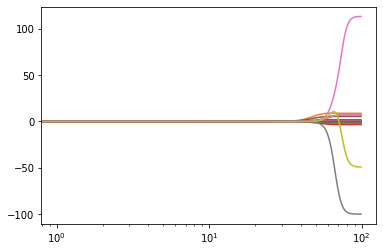

In [ ]:
ax = plt.gca()
ax.plot(katsayılar);
ax.set_xscale("log")

##Tahmin

In [ ]:
ridge_model = Ridge().fit(x_train,y_train)

In [ ]:
y_pred = ridge_model.predict(x_train)
y_pred[:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [ ]:
y_train[:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

##Hata

In [ ]:
RMSETR= np.sqrt(mean_squared_error(y_train,y_pred))
RMSETR

289.34470696006565

Cross Val hatası ile hesaplanırsa daha doğru bir hata elde edilir.

In [ ]:
 RMSETR= np.sqrt(np.mean(-cross_val_score(ridge_model,x_train,y_train,cv=10,scoring = "neg_mean_squared_error")))
 RMSETR

351.39315856063195

In [ ]:
y_pred = ridge_model.predict(x_test) 
RMSETE= np.sqrt(mean_squared_error(y_test,y_pred))
RMSETE

356.8082905730239

##Model Tuning

In [ ]:
ridge_model =Ridge().fit(x_train,y_train)
y_pred = ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.8082905730239

In [ ]:
lambdalar1 = np.random.randint(0,1000,100)

In [ ]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [ ]:
ridge_cv = RidgeCV(alphas=lambdalar1,scoring="neg_mean_squared_error",cv=10,normalize = True)

In [ ]:
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([443, 562, 100,   9, 128, 813, 521, 159,   3, 987, 150, 259, 435,
       742, 799, 145,  77, 250, 796,  99, 358, 829, 318, 215, 853,  43,
       783, 996, 108,  40, 367, 821, 904, 109, 926, 556, 462, 500, 566,
       456, 466, 598, 514,  79, 713, 814, 311, 154, 657,  24, 958, 275,
       274, 245, 375, 300, 690, 520, 276, 700, 716, 703, 320, 867, 441,
       473, 163, 471, 618, 192, 284, 931,  61, 203, 761, 405, 956,  57,
       331, 380, 377, 615, 678, 196, 648, 581, 714, 377, 425, 840, 986,
        90, 325, 912, 575, 118, 329, 563, 414, 437]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [ ]:
ridge_cv.alpha_#optimum parametre

3

final modeli

In [ ]:
ridge_tuned = Ridge(alpha=ridge_cv.alpha_).fit(x_train,y_train)

In [ ]:
y_pred = ridge_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.5293736297367

#Lasso Regresyon

##Modelin Kurulması

In [ ]:
from sklearn.linear_model import Lasso,LassoCV

In [ ]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
lasso_model = Lasso().fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850426, tolerance: 3898.6869563806586
  positive)


In [ ]:
lasso_model.intercept_

-5.587450677335255

In [ ]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [ ]:
lasso= Lasso()
coefs = []
alphas = lambdalar2
for a in alphas:
  lasso.set_params(alpha= a)
  lasso.fit(x_train,y_train)
  coefs.append(lasso.coef_)

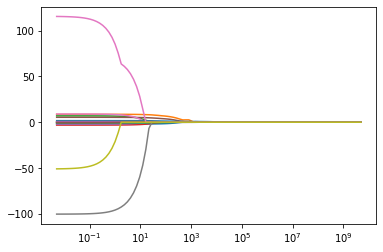

In [ ]:
ax=plt.gca()
ax.plot(alphas,coefs);
ax.set_xscale("log")

##Tahmin

In [ ]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_model.predict(x_train)[:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [ ]:
lasso_model.predict(x_test)[:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [ ]:
y_pred = lasso_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.09758845540324

In [ ]:
r2_score(y_test,y_pred)

0.414227981323662

##Tuning

In [ ]:
lasso_cv_model = LassoCV(alphas = lambdalar2,cv=10,max_iter=100000).fit(x_train,y_train)


In [ ]:
lasso_cv_model.alpha_

201.85086292982749

In [ ]:
 lasso_tuned = Lasso(alpha= lasso_cv_model.alpha_).fit(x_train,y_train)
 

In [ ]:
y_pred = lasso_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

363.68327080374456

Sıfır olan değişkenler etkisi olmayan değişkenlerdir.

In [ ]:
pd.Series(lasso_tuned.coef_,index=x_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

#ElasticNet Regresyon

##Model Ve Tahmin

In [ ]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [ ]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
enet_model = ElasticNet().fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367338, tolerance: 3898.6869563806586
  positive)


In [ ]:
enet_model.intercept_

-6.465955602112217

In [ ]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [ ]:
enet_model.predict(x_train)[:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [ ]:
enet_model.predict(x_test)[:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [ ]:
y_pred = enet_model.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181244

In [ ]:
r2_score(y_test,y_pred)

0.41070222469326934

Model Tuning

In [ ]:
enetcvmodel = ElasticNetCV(alphas=lambdalar2 ,cv=10).fit(x_train,y_train)

In [ ]:
enetcvmodel.alpha_

5748.784976988678

In [ ]:
enetcvmodel.coef_

array([ 0.61111381,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.11212622,  0.        ,
        0.25252702,  0.18656722,  0.00444355,  0.30988823,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [ ]:
enetcvmodel.intercept_

-31.463121225640975

In [ ]:
enet_tuned = ElasticNet(alpha=enetcvmodel.alpha_).fit(x_train,y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test,enet_tuned.predict(x_test)))

393.97530658505536